In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston 

In [3]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
X = boston_df.drop(['Price'],axis=1)
y = boston_df['Price']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train,y_train)

train_score = dt_regressor.score(X_train,y_train)
test_score = dt_regressor.score(X_test,y_test)

y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print('R-squared Train score:',train_score)
print('R-squared Test score:',test_score)
print('Predict:',y_pred)
print('MSE:',mse)
print('R-MSE:',mse**(1/2.0))

R-squared Train score: 1.0
R-squared Test score: 0.7883469977102741
Predict: [29.9 24.5 27.1 20.9 15.3 18.5 30.8 18.4 21.7 22.  22.8 37.  19.6 17.4
 19.3 15.  12.  37.6 24.6 11.8 15.  13.1 24.  23.1 24.7  8.7 13.6 21.7
 50.  12.8 32.4 23.1 48.5 18.4 36.2 21.2 18.4 34.7 12.  14.9 24.2 22.2
 29.  14.1 13.8  8.4 50.  13.8 23.8 17.2 15.  20.1 24.6 22.3  7.  23.1
 11.3 22.8 17.4 37.6 13.1 27.1 12.8 19.  14.4 33.4 37.6 22.3 20.1 22.3
 25.2  5.  20.1 22.8 18.4 15.  50.  26.4 21.6 33.1 17.4 19.8 32.7 10.8
 24.6 24.7 17.1 25.2 19.9 15.6 26.6 48.8 16.2 22.6 17.7 22.6 28.7 21.6
 37.6 21.2 19.  23.2 25.2 36.2  7.4 22.2 19.  21.6 26.4 27.5 50.  22.3
 13.4 33.2 36.5 33.1 23.9 18.2 33.3 50.  20.1 13.4 30.8 16.1 23.3 21.2
 22.2 11.9 20.1 32.4 19.3 21.  28.1 10.2 23.3 33.2 15.6 23.2 45.4 15.2
 23.1 15.6 19.4 23.2 33.1 19.4 23.1 14.1 29.  18.8 31.  13.6]
MSE: 19.39894736842105
R-MSE: 4.404423613643567


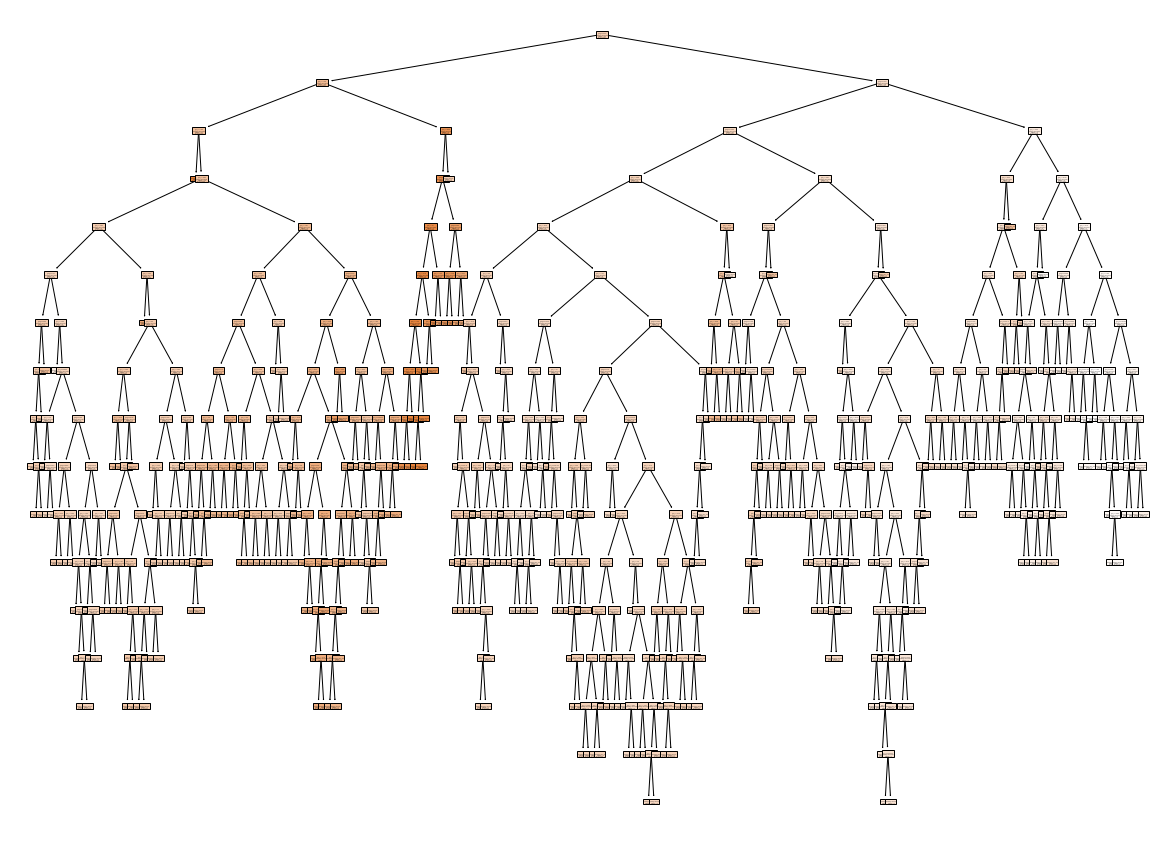

In [9]:
plt.figure(figsize=(20,15))
plot_tree(dt_regressor,filled=True,class_names=True)
plt.show()

In [10]:
dt_regressor = DecisionTreeRegressor(max_depth=7)
dt_regressor.fit(X_train,y_train)

train_score = dt_regressor.score(X_train,y_train)
test_score = dt_regressor.score(X_test,y_test)

y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print('R-squared Train score:',train_score)
print('R-squared Test score:',test_score)
# print('Predict:',y_pred)
print('MSE:',mse)
print('R-MSE:',mse**(1/2.0))

R-squared Train score: 0.9721142385064595
R-squared Test score: 0.7655493219176258
MSE: 21.488456650309356
R-MSE: 4.635564329217033


In [11]:
for i in range(1,11):
    dt_regressor = DecisionTreeRegressor(max_depth=i)
    dt_regressor.fit(X_train,y_train)

    train_score = dt_regressor.score(X_train,y_train)
    test_score = dt_regressor.score(X_test,y_test)

    y_pred = dt_regressor.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)

    print('Max_depth at',i,'\nR-squared Train score:',train_score)
    print('R-squared Test score:',test_score)
    # print('Predict:',y_pred)
    print('MSE:',mse)
    print('R-MSE:',mse**(1/2.0))

Max_depth at 1 
R-squared Train score: 0.44966967889249665
R-squared Test score: 0.40923270541445766
MSE: 54.14647338175619
R-MSE: 7.358428730493772
Max_depth at 2 
R-squared Train score: 0.6754964749237866
R-squared Test score: 0.720452737210959
MSE: 25.621760991641807
R-MSE: 5.061794246276888
Max_depth at 3 
R-squared Train score: 0.7997484827406776
R-squared Test score: 0.8064580887242153
MSE: 17.738984610684234
R-MSE: 4.211767397504786
Max_depth at 4 
R-squared Train score: 0.8857388736713648
R-squared Test score: 0.752546394167956
MSE: 22.68023332402711
R-MSE: 4.762376856573523
Max_depth at 5 
R-squared Train score: 0.9224660093061451
R-squared Test score: 0.8627140711202218
MSE: 12.582871397770337
R-MSE: 3.5472343308231467
Max_depth at 6 
R-squared Train score: 0.9485651664023145
R-squared Test score: 0.8094279028902632
MSE: 17.46678781650745
R-MSE: 4.179328632269476
Max_depth at 7 
R-squared Train score: 0.9721142385064595
R-squared Test score: 0.8351613494462882
MSE: 15.1082019

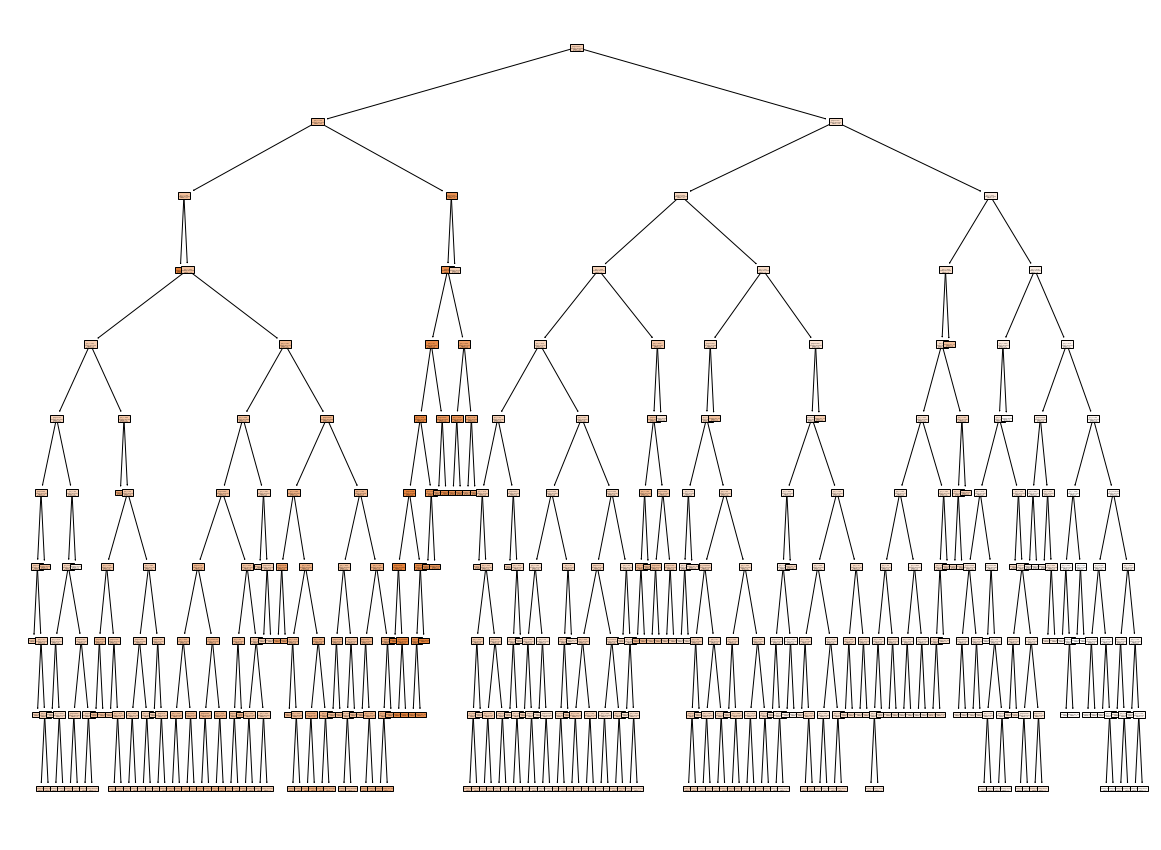

In [12]:
plt.figure(figsize=(20,15))
plot_tree(dt_regressor,filled=True,class_names=True)
plt.show()